In [20]:
import pandas as pd
import math
import statsmodels.api as sm
from scipy.stats import pearsonr
import numpy as np

In [27]:
def get_corr(df2):
    #print(df2.info())
    c=df2.corr()
    c[:] = np.where(c.eq('NaN'), 0, c)
    #c = c.replace('NaN', 0)
    #print(c)
    return c
def get_data(country):
    url = 'alldata/'+country+'.csv'
    dateparse = lambda dates: [pd.datetime.strptime(d, '%d-%m-%Y') for d in dates]
    df = pd.read_csv(url,parse_dates = True,date_parser=dateparse,index_col=1)
    #df['date'] = pd.to_datetime(df.date, format='%d/%m/%Y')
    master_col='active_case'
    active_case=df['confirmed']-df['deaths']-df['recovered'] #caluculate active case
    df2=df[['humidity_mean','humidity_std','dew_mean','dew_std','mean_ozone','std_ozone',
          'mean_precip','std_precip','mean_tMax','std_tMax','mean_tMin','std_tMin','mean_uv','std_uv']].copy()
    df2['active_case']=active_case #add active case
    c=get_corr(df2)
    
    return c


In [35]:
import os
arr = os.listdir('alldata/')
count_all = pd.read_csv('result.csv')
final_cor=np.zeros((15,15))
for c in(arr):
    country=c[:-4]
    #print(country)
    c=get_data(country)
    npc=np.array(c)
    where_are_NaNs = np.isnan(npc)
    npc[where_are_NaNs] = 0
    print(npc)
    final_cor=final_cor+npc

C:\Users\ase072\AppData\Local\Continuum\anaconda3\envs\ratnabali2\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  # Remove the CWD from sys.path while we load stuff.


[[ 1.          0.          0.73903876  0.          0.01342774  0.
   0.82721529  0.         -0.19927522  0.          0.16793389  0.
  -0.29424084  0.          0.30018538]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.73903876  0.          1.          0.         -0.06776347  0.
   0.55525336  0.          0.49073955  0.          0.72554014  0.
   0.17683894  0.          0.52024282]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.01342774  0.         -0.06776347  0.          1.          0.
  -0.0085442   0.         -0.07102498  0.         -0.1727381   0.
  -0.22620252  0.          0.29237989]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        

[[ 1.          0.          0.7346582   0.         -0.16726129  0.
   0.82376942  0.         -0.69056545  0.          0.0216673   0.
  -0.18508496  0.          0.02786742]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.7346582   0.          1.          0.          0.17094479  0.
   0.5608462   0.         -0.17681017  0.          0.33755298  0.
   0.09633255  0.          0.29400986]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.16726129  0.          0.17094479  0.          1.          0.
  -0.14144697  0.          0.34709091  0.          0.17651726  0.
   0.36327433  0.          0.72974336]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        

[[ 1.          0.          0.49961866  0.          0.22835837  0.
   0.80056456  0.         -0.79823546  0.         -0.04084208  0.
  -0.63923683  0.          0.07776142]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.49961866  0.          1.          0.         -0.0907081   0.
   0.27804355  0.         -0.00940837  0.          0.4593541   0.
  -0.2365373   0.         -0.21223428]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.22835837  0.         -0.0907081   0.          1.          0.
   0.09344902  0.         -0.32068717  0.         -0.21740863  0.
   0.17718942  0.          0.38989688]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        

[[ 1.          0.          0.76717601  0.         -0.12070062  0.
   0.80498051  0.         -0.76157222  0.          0.28561515  0.
  -0.50364145  0.         -0.17790736]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.76717601  0.          1.          0.         -0.09622355  0.
   0.69907562  0.         -0.32463376  0.          0.52969544  0.
  -0.28097553  0.         -0.26255731]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.12070062  0.         -0.09622355  0.          1.          0.
  -0.11044205  0.         -0.07028182  0.          0.1101904   0.
   0.60446701  0.          0.28793134]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        

[[ 1.          0.          0.41685803  0.          0.43471306  0.
   0.68823296  0.         -0.75431025  0.         -0.55146621  0.
  -0.40012877  0.         -0.03942423]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.41685803  0.          1.          0.          0.02046773  0.
   0.14469427  0.          0.25341863  0.          0.40707729  0.
   0.16653217  0.          0.12775699]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.43471306  0.          0.02046773  0.          1.          0.
   0.55427958  0.         -0.49271363  0.         -0.34642094  0.
  -0.33033313  0.          0.33011634]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        

[[ 1.          0.          0.68605861  0.         -0.12372398  0.
   0.61391812  0.         -0.70052295  0.          0.2066655   0.
  -0.61897138  0.          0.06717512]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.68605861  0.          1.          0.          0.20415474  0.
   0.66988019  0.         -0.18893098  0.          0.4814679   0.
  -0.33246108  0.          0.09260383]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.12372398  0.          0.20415474  0.          1.          0.
   0.36453448  0.          0.27778892  0.          0.28799752  0.
   0.09239958  0.          0.50305464]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        

[[ 1.          0.          0.40772503  0.          0.09721664  0.
   0.67608076  0.         -0.541261    0.         -0.28855269  0.
  -0.59475218  0.         -0.39556292]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.40772503  0.          1.          0.         -0.22880602  0.
   0.34898845  0.          0.4554792   0.          0.56271547  0.
   0.05445151  0.         -0.35342139]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.09721664  0.         -0.22880602  0.          1.          0.
   0.3975557   0.         -0.43243444  0.         -0.25955151  0.
  -0.15188235  0.          0.26614325]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        

[[ 1.          0.          0.59318855  0.         -0.4050528   0.
   0.53890027  0.          0.02341451  0.          0.17536678  0.
  -0.53714039  0.         -0.40252158]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.59318855  0.          1.          0.         -0.3904999   0.
   0.28806606  0.          0.77101271  0.          0.78744112  0.
   0.08893393  0.         -0.26287244]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.4050528   0.         -0.3904999   0.          1.          0.
  -0.02273518  0.         -0.21940302  0.         -0.35205688  0.
   0.03331455  0.          0.15092744]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        

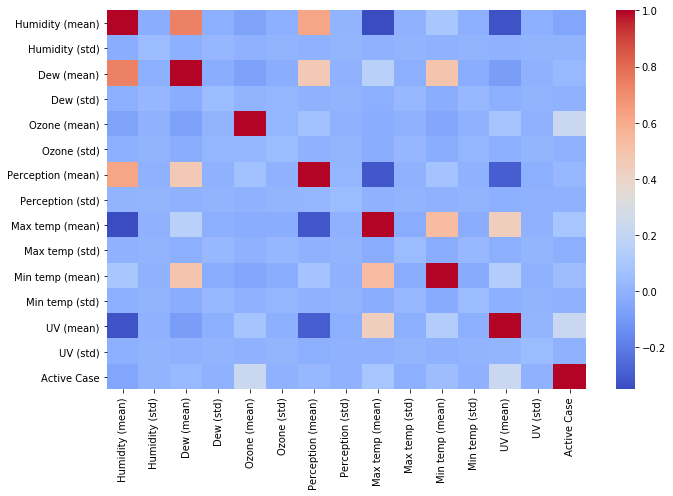

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
corr = final_cor
corr=corr/169
fig= plt.figure(figsize=(10,7))
l=['Humidity (mean)', 'Humidity (std)', 'Dew (mean)', 'Dew (std)', 'Ozone (mean)',
       'Ozone (std)', 'Perception (mean)', 'Perception (std)', 'Max temp (mean)', 'Max temp (std)',
       'Min temp (mean)', 'Min temp (std)', 'UV (mean)', 'UV (std)', 'Active Case']
sns.heatmap(corr,xticklabels=l, yticklabels=l,cmap="coolwarm")
rcParams.update({'figure.autolayout': True})
plt.savefig('cor.png',dpi=200)

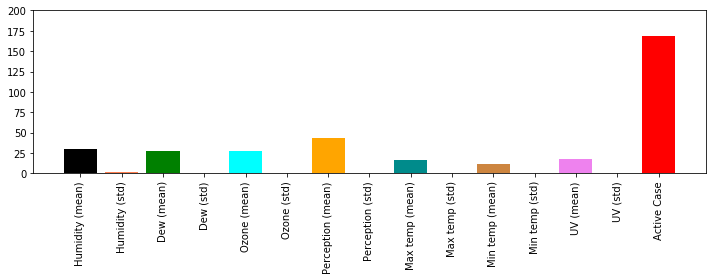

In [80]:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
x=np.array(count_all.head(1)).ravel()
print(len(x))

15
